In [ ]:
# Writer: Yoo Young Seok
# Date: 2023-06-03

Our second datasets to use in this project is tweet posts in PersonalityCafe Forum. The link to download is here: https://www.kaggle.com/datasets/datasnaek/mbti-type?resource=downloadt

In [1]:
import pandas as pd

In [2]:
# Specify folder location for this project (where your datasets located)

folder_loc = '/content/drive/MyDrive/Colab Notebooks/인공지능프로젝트/TEAM/' 

In [15]:
df = pd.read_csv(folder_loc + 'mbti_1.csv')

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [18]:
# we set ESTJ the base MBTI

# transform label to each E(E = 1, I = 0), S(S = 1, N = 0), T(T = 1, F = 0), J(J = 1, P = 0).
df['E'] = df['type'].str[0].apply(lambda x: 1 if x == 'E' else 0)
df['S'] = df['type'].str[1].apply(lambda x: 1 if x == 'S' else 0)
df['T'] = df['type'].str[2].apply(lambda x: 1 if x == 'T' else 0)
df['J'] = df['type'].str[3].apply(lambda x: 1 if x == 'J' else 0)

df.head()

,type,posts,E,S,T,J
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,1


## Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

The number of exmaples for each MBTI type

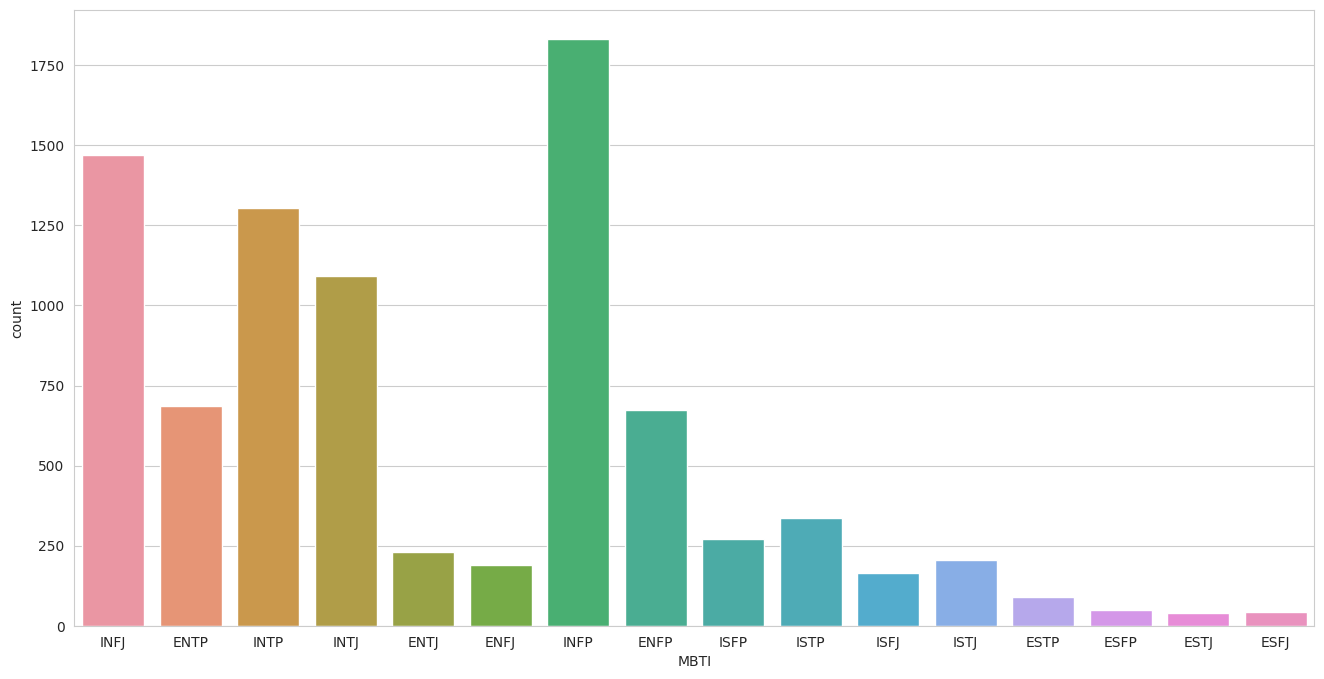

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df, x='type')
ax.set_xlabel('MBTI')

plt.show()

The number of examples of each 4 types of MBTI (E vs I, S vs N, T vs F, J vs P)

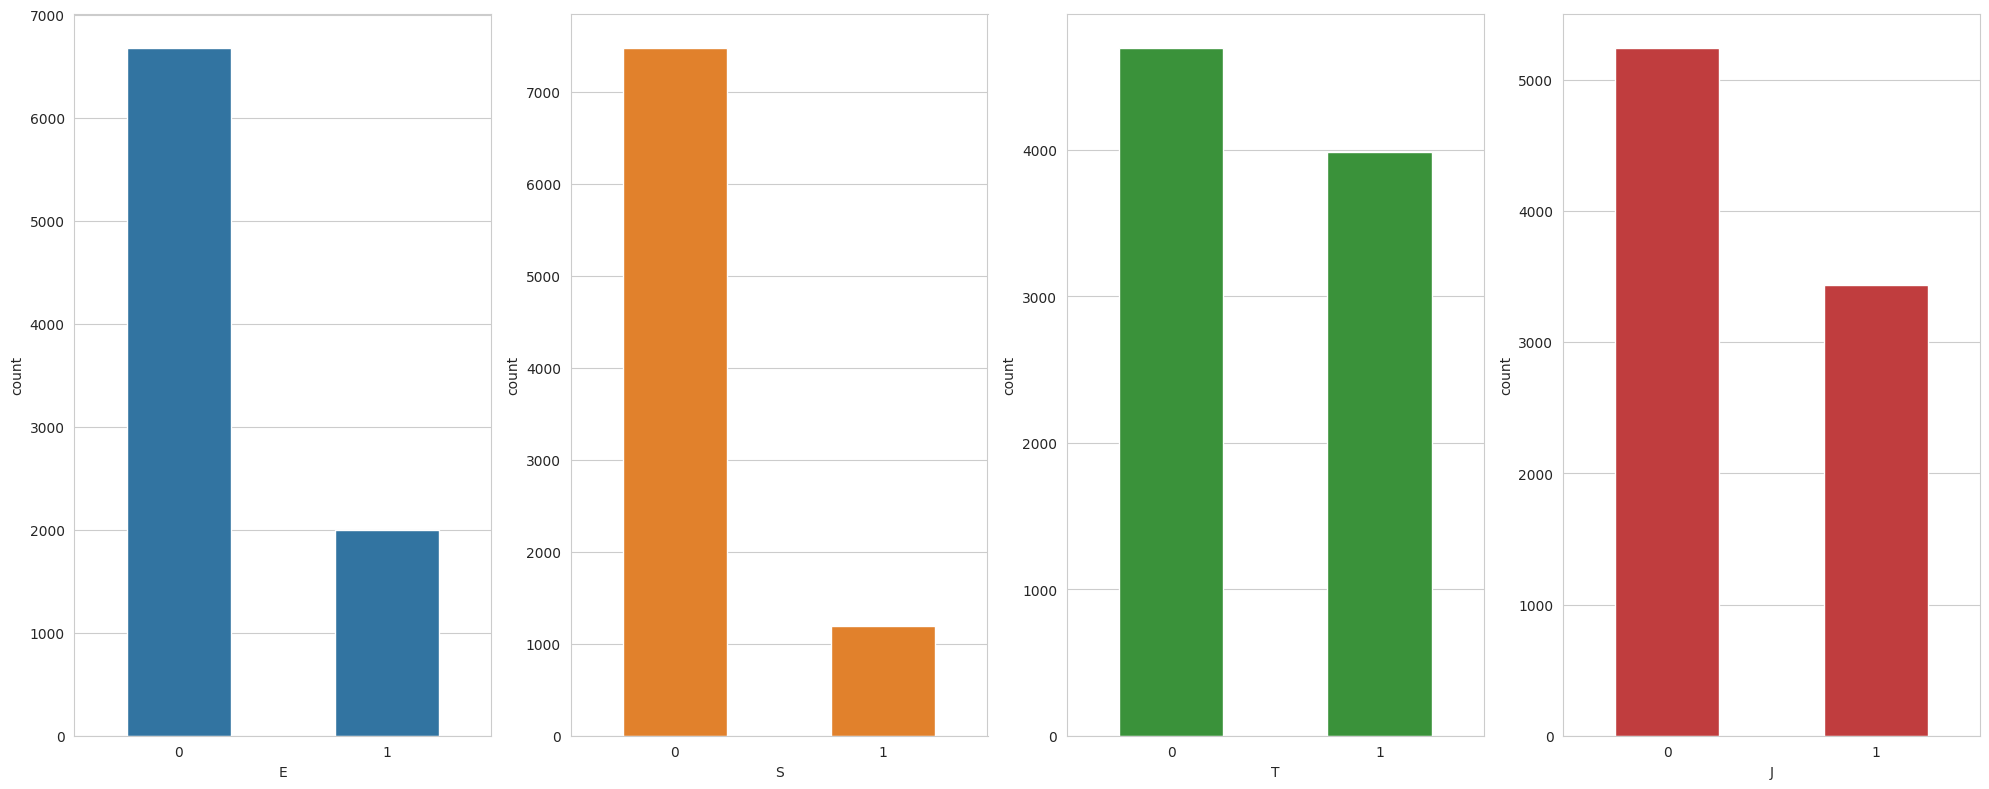

In [ ]:
base = 'ESTJ'

plt.figure(figsize=(20, 8))
colors = plt.rcParams["axes.prop_cycle"]()

for i in range(4):
  plt.subplot(1, 4, i+1)
  c = next(colors)['color']
  sns.countplot(data=df, x=base[i], width=0.5, color=c)

plt.tight_layout()
plt.show()

From these distributions, one we have to do is fill the dificient MBTI datasets

1. I > E
2. N > S
3. F > T
4. P > J

The distribution of the length of text data of each users

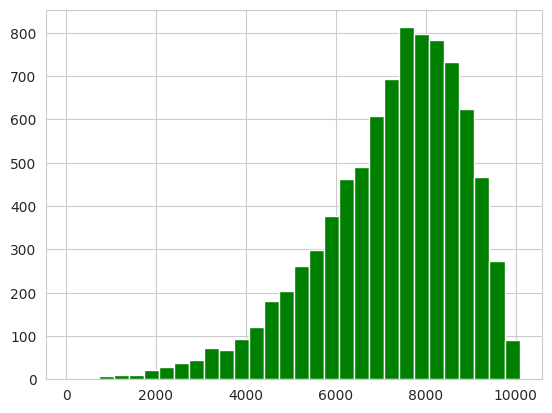

In [ ]:
text_length = df['posts'].apply(len)

plt.hist(x=text_length, bins=30, color='green')
plt.show()

### Observation

Let's look a one of text examples then observe the things that need to be preprocessed

In [ ]:
df.loc[700]['posts'] # show one of the text examples

"'http://swansonquotes.com/wp-content/uploads/s05-ep01-veggies2-1000x500.jpg|||What I do after I hurt my loved one is that I make my whole world about him, so it's obvious I'm doing the best I can to help him feel better after my fuck-up. I aim to make him feel safe around me...|||@Freeflowingthoughts  My psychologist has ADHD, and she got her PhD while having 3 grand-kids to take care of because her daughter is a drug addict. I mention that to explain the level of stress...|||Your friendly neighborhood Spiderman has arrived.  https://media.giphy.com/media/3oEduRoIkJ1pJsutzy/giphy.gif  https://media.giphy.com/media/y9bsry0lwu6uQ/giphy.gif ...|||Student.  I used to be an art major, wanting to be an animator, illustrator & comic artist. Changed it to computer science and the goal was to go to graduate school for artificial intelligence. ...|||At the height of my dysfunctional upbringing, there was a point where I broke down screaming at my parents because they were trying to make me clea

# BERT Model

The model we use in this project is Bidirectional Encoder Representations from Transformers (BERT),a family of language models introduced in 2018 by researchers at Google. What we have to do is validating the effect of preprocesses we are going to. Because BERT model is too heavy, let's use the DistilBERT, a distilled version of BERT. The library we are going to use is hugging face.

In [3]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.8 MB/s eta 0:00:00


In [41]:
## sample 100 rows of dataset

df_sample = df.sample(n=100, random_state=42)

In [4]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, BertModel, TrainingArguments, Trainer

In [26]:
class BertDataset(Dataset):

  def __init__(self, df):
    self.labels = [[data['E'], data['S'], data['T'], data['J']] for _, data in df.iterrows()]
    self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")
    self.tokenized = [self.tokenizer(post, padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for post in df['posts']]

  def __len__(self):
    return len(self.labels)
  
  def __getitem__(self, idx):
    return self.tokenized[idx], torch.tensor(self.labels[idx])

In [7]:
class BertClassifier(nn.Module):
  
  def __init__(self):
    super(BertClassifier, self).__init__()

    self.bert = BertModel.from_pretrained('distilbert-base-multilingual-cased')
    self.linear = nn.Linear(768, 4)
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
  
  def forward(self, input_ids, masks):
    _, pooled_output = self.bert(input_ids=input_ids, attention_mask=masks, return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    final_layer = self.relu(linear_output)

    return final_layer

In [38]:
from torch.optim import Adam
from torch.utils.data import random_split
from tqdm import tqdm

In [40]:
def train_once(model, df, batch_size):
  data = BertDataset(df)

  generator = torch.Generator().manual_seed(42)
  train_data, test_data = random_split(data, [0.8, 0.2])
  train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

  model.train()

  criterion = nn.BCEWithLogitsLoss()
  optimizer = Adam(model.parameters(), lr= 1e-6)

  device = torch.device('cuda')
  model.to(device)

  loss_train = 0

  for input, label in tqdm(train_loader):
    input_ids = input['input_ids'].squeeze(1).to(device)
    input_masks = input['attention_mask'].to(device)
    input_labels = label.to(device)

    output = model(input_ids, input_masks)

    batch_loss = criterion(output, input_labels.float())
    loss_train += batch_loss.item()

    model.zero_grad()
    batch_loss.backward()
    optimizer.step()

    print(f'Train Loss : {batch_loss}')

  correct_mbti = 0

  model.eval()
  
  with torch.no_grad():
    for input, label in tqdm(test_loader):
      input_ids = input['input_ids'].squeeze(1).to(device)
      input_masks = input['attention_mask'].to(device)
      input_labels = label.to(device)

      output = model(input_ids, input_masks)

      correct_mbti += ((torch.sigmoid(output) > 0.5) == input_labels.float()).sum()

    print(f"Accuracy: {correct_mbti / len(test_loader) / batch_size / 4 * 100}%")

Let's Go for pure data



In [42]:
model = BertClassifier()
train_once(model, df_sample, 4)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing BertModel: ['distilbert.transformer.layer.2.attention.out_lin.bias', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.2.ffn.lin2.bias', 'distilbert.transformer.layer.4.attention.q_lin.weight', 'vocab_projector.bias', 'distilbert.transformer.layer.3.ffn.lin2.bias', 'distilbert.transformer.layer.4.sa_layer_norm.weight', 'distilbert.transformer.layer.2.ffn.lin2.weight', 'distilbert.transformer.layer.5.attention.v_lin.bias', 'distilbert.transformer.layer.5.ffn.lin1.bias', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.5.attention.k_lin.bias', 'distilbert.tr

Train Loss : 0.7215690612792969


 10%|█         | 2/20 [00:00<00:08,  2.12it/s]

Train Loss : 0.6988829374313354


 15%|█▌        | 3/20 [00:01<00:08,  2.08it/s]

Train Loss : 0.7259411811828613


 20%|██        | 4/20 [00:01<00:07,  2.15it/s]

Train Loss : 0.6963866353034973


 25%|██▌       | 5/20 [00:02<00:06,  2.18it/s]

Train Loss : 0.70230633020401


 30%|███       | 6/20 [00:02<00:06,  2.20it/s]

Train Loss : 0.6984531879425049


 35%|███▌      | 7/20 [00:03<00:05,  2.22it/s]

Train Loss : 0.6972194910049438


 40%|████      | 8/20 [00:03<00:05,  2.20it/s]

Train Loss : 0.693434476852417


 45%|████▌     | 9/20 [00:04<00:04,  2.21it/s]

Train Loss : 0.6948518753051758


 50%|█████     | 10/20 [00:04<00:04,  2.24it/s]

Train Loss : 0.6931471824645996


 55%|█████▌    | 11/20 [00:05<00:03,  2.25it/s]

Train Loss : 0.6931471824645996


 60%|██████    | 12/20 [00:05<00:03,  2.27it/s]

Train Loss : 0.6931471824645996


 70%|███████   | 14/20 [00:06<00:02,  2.29it/s]

Train Loss : 0.6931471824645996
Train Loss : 0.6931471824645996


 75%|███████▌  | 15/20 [00:06<00:02,  2.29it/s]

Train Loss : 0.6931471824645996


 85%|████████▌ | 17/20 [00:07<00:01,  2.29it/s]

Train Loss : 0.6931471824645996
Train Loss : 0.6931471824645996


 90%|█████████ | 18/20 [00:08<00:00,  2.27it/s]

Train Loss : 0.6931471824645996


100%|██████████| 20/20 [00:08<00:00,  2.24it/s]


Train Loss : 0.6931471824645996
Train Loss : 0.6931471824645996


100%|██████████| 5/5 [00:00<00:00,  7.60it/s]


Accuracy: 67.5%


## Text Data Preprocessing

### 1. Removing separations of each entries

The model we are going to use is BERT. In BERT paper, sentence is not a sentence we generally thought. BERT says that sentence can be *paragraph*, contiguous text.

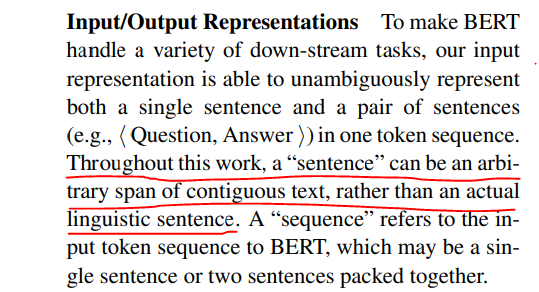

In these text datasets, each tweets are separated by '|||', 3 pipe characters. But for above reason, these does not help for BERT, even have possibility to make BERT understand these meaningless characters, also memory-ineffective. So, we remove these characters to just ' ' (space).

In [10]:
df_sample['posts'] = df_sample['posts'].str.replace('|||', ' ', regex=False)

### 2. Link to Text

As seen above, you may find lots of URL link texts such as https://t.co/KwYIpSf0vQ. But this rough texts are not helpful for text classificatoin. To transform these links to meaningful words, we decide to replace them with title of the pages.

In [11]:
!pip install mechanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 1.9 MB/s eta 0:00:00


In [12]:
from mechanize import Browser
import re

regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [13]:
import mechanize

def removeURL(str):
  obj_iter = re.finditer(regex, str)

  for obj in obj_iter:
    url = obj.group()

    str = str.replace(url, '')
  
  return str

def replaceURLwithTitle(str):
  obj_iter = re.finditer(regex, str)
  br = Browser()
  br.addheaders = [('User-agent', 'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.1) Gecko/2008071615 Fedora/3.0.1-1.fc9 Firefox/3.0.1')]
  br.set_handle_robots(False)

  for obj in obj_iter:
    url = obj.group()
    try:
      br.open(url)
      br._factory.is_html = True
    except (mechanize.URLError):
      str = str.replace(url, '')
      continue

    title = br.title()
    title = removeURL(title)

    str = str.replace(url, title)
  
  return str

In [ ]:
replaceURLwithTitle(df.loc[700, 'posts'])

https://media.giphy.com/media/3oEduRoIkJ1pJsutzy/giphy.gif -> 
https://media.giphy.com/media/y9bsry0lwu6uQ/giphy.gif -> 
http://vignette2.wikia.nocookie.net/arifureta-shokugyou-de-sekai-saikyou/images/3/30/Rainbow_puke.gif/revision/latest?cb=20160304082136 -> 
https://www.youtube.com/watch?v=eFU_wJes-xE -> 
https://m.popkey.co/c3e1c7/ldbWK_s-200x150.gif -> 
https://sarabynoe.files.wordpress.com/2013/03/help-me-im-poor.gif?w=620 -> 
https://66.media.tumblr.com/9423201f6b6ec674bedf7d90f2bf803e/tumblr_np5d5fCOmR1saqt26o1_r1_500.gif -> 
https://www.youtube.com/watch?v=40XR-A6-e38 -> SAINT MOTEL - "At Least I Have Nothing" (Official Music Video) - YouTube
https://www.youtube.com/watch?v=40XR-A6-e38 -> SAINT MOTEL - "At Least I Have Nothing" (Official Music Video) - YouTube
http://40.media.tumblr.com/8d43e9cff6fa4a2f023559255213aeca/tumblr_o3ge4na2DR1v4qpfso1_1280.jpg -> 


'\' What I do after I hurt my loved one is that I make my whole world about him, so it\'s obvious I\'m doing the best I can to help him feel better after my fuck-up. I aim to make him feel safe around me... @Freeflowingthoughts  My psychologist has ADHD, and she got her PhD while having 3 grand-kids to take care of because her daughter is a drug addict. I mention that to explain the level of stress... Your friendly neighborhood Spiderman has arrived.     ... Student.  I used to be an art major, wanting to be an animator, illustrator & comic artist. Changed it to computer science and the goal was to go to graduate school for artificial intelligence. ... At the height of my dysfunctional upbringing, there was a point where I broke down screaming at my parents because they were trying to make me clean my room, and I was so against it because my room... INTPs. All of the ones I\'ve met are a bunch of lovable babies.   Basic Questions:  1) Age or Age Range? 19  2) City,... I was stressed th

In [14]:
df_sample['posts'] = df_sample['posts'].apply(replaceURLwithTitle)

In [15]:
df_sample.to_csv(folder_loc + 'sample.csv')

In [43]:
df_sample = pd.read_csv(folder_loc + 'sample.csv')

### Mideterm Validation

In [44]:
model = BertClassifier()
train_once(model, df_sample, 4)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing BertModel: ['distilbert.transformer.layer.2.attention.out_lin.bias', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.2.ffn.lin2.bias', 'distilbert.transformer.layer.4.attention.q_lin.weight', 'vocab_projector.bias', 'distilbert.transformer.layer.3.ffn.lin2.bias', 'distilbert.transformer.layer.4.sa_layer_norm.weight', 'distilbert.transformer.layer.2.ffn.lin2.weight', 'distilbert.transformer.layer.5.attention.v_lin.bias', 'distilbert.transformer.layer.5.ffn.lin1.bias', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.5.attention.k_lin.bias', 'distilbert.tr

Train Loss : 0.7222475409507751


 10%|█         | 2/20 [00:00<00:08,  2.18it/s]

Train Loss : 0.6841309070587158


 15%|█▌        | 3/20 [00:01<00:08,  2.11it/s]

Train Loss : 0.7013585567474365


 20%|██        | 4/20 [00:01<00:07,  2.15it/s]

Train Loss : 0.696720540523529


 25%|██▌       | 5/20 [00:02<00:07,  2.13it/s]

Train Loss : 0.6984633207321167


 30%|███       | 6/20 [00:02<00:06,  2.14it/s]

Train Loss : 0.6688365936279297


 35%|███▌      | 7/20 [00:03<00:06,  2.14it/s]

Train Loss : 0.7057157158851624


 45%|████▌     | 9/20 [00:04<00:05,  2.17it/s]

Train Loss : 0.6912328600883484
Train Loss : 0.6451862454414368


 50%|█████     | 10/20 [00:04<00:04,  2.15it/s]

Train Loss : 0.6493399143218994


 55%|█████▌    | 11/20 [00:05<00:04,  2.15it/s]

Train Loss : 0.6690183877944946


 60%|██████    | 12/20 [00:05<00:03,  2.14it/s]

Train Loss : 0.7277712821960449


 65%|██████▌   | 13/20 [00:06<00:03,  2.13it/s]

Train Loss : 0.7089744210243225


 70%|███████   | 14/20 [00:06<00:02,  2.12it/s]

Train Loss : 0.7377575039863586


 75%|███████▌  | 15/20 [00:07<00:02,  2.12it/s]

Train Loss : 0.7119797468185425


 80%|████████  | 16/20 [00:07<00:01,  2.12it/s]

Train Loss : 0.6669039130210876


 85%|████████▌ | 17/20 [00:07<00:01,  2.13it/s]

Train Loss : 0.7088198661804199


 90%|█████████ | 18/20 [00:08<00:00,  2.13it/s]

Train Loss : 0.6696028709411621


 95%|█████████▌| 19/20 [00:08<00:00,  2.13it/s]

Train Loss : 0.7089592814445496


100%|██████████| 20/20 [00:09<00:00,  2.13it/s]


Train Loss : 0.697553813457489


100%|██████████| 5/5 [00:00<00:00,  8.12it/s]


Accuracy: 70.0%


### NOTICE 

But..you know...if we are going to use another datasets other than tweets, this may be helpful!!! Even if it spends much time, we leave this function and plan to utilize it to other datasets and prioritize efficiency.

### 3. Removing @ (mention symbol) & escape characters(\n,...)

In tweets, there are so many @, mention symbols. But this symbol is not helpful for text classification. But username after @ can be helpful because it means indicating and sometimes it can be a subject word itself. Also escape characters such as '\n' does not help models understand meaning of sentences. So, we also remove them

In [45]:
df_sample['posts'] = df_sample['posts'].str.replace('@','') # Remove @

In [46]:
# Remove escape characters
escapes = ''.join([chr(char) for char in range(1, 32)])
translator = str.maketrans('', '', escapes)
df_sample['posts'] = df_sample['posts'].str.translate(translator)

### 4. Emoji to Text

A pre-trained BERT  will only have reserved code points for them if they were in the data that was used to create the WordPiece tokenizer. But the WordPiece vocab does not mention emoji. So what we have to do is convert emoji to meaningful text

In [47]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=9edd97f732da9b1aec31c5f5933dad539a583ac4fd969bac0c252a2c38266978
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [49]:
from emoji import demojize

In [ ]:
# Here is the example

temp = 'I love AI!😁'
demojize(temp)

'I love AI!:beaming_face_with_smiling_eyes:'

In [50]:
df_sample['posts'] = df_sample['posts'].apply(demojize)

### 5. Replace apostrophes with words

The last we could observe is that there are many appostrophes such as 's. So we replace them with words for more convenience of learning.

In [52]:
df_sample['posts'] = df_sample['posts'].str.replace(r'n\'t', ' not', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'s', ' is', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'m', ' am', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'re', ' are', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'ve', ' have', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'ll', ' will', regex=False)
df_sample['posts'] = df_sample['posts'].str.replace(r'\'d', ' would', regex=False)

## Final Validation

In [54]:
model = BertClassifier()
train_once(model, df_sample, 4)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing BertModel: ['distilbert.transformer.layer.2.attention.out_lin.bias', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.2.ffn.lin2.bias', 'distilbert.transformer.layer.4.attention.q_lin.weight', 'vocab_projector.bias', 'distilbert.transformer.layer.3.ffn.lin2.bias', 'distilbert.transformer.layer.4.sa_layer_norm.weight', 'distilbert.transformer.layer.2.ffn.lin2.weight', 'distilbert.transformer.layer.5.attention.v_lin.bias', 'distilbert.transformer.layer.5.ffn.lin1.bias', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.5.attention.k_lin.bias', 'distilbert.tr

Train Loss : 0.6807198524475098


 10%|█         | 2/20 [00:00<00:08,  2.14it/s]

Train Loss : 0.6938256025314331


 15%|█▌        | 3/20 [00:01<00:08,  2.11it/s]

Train Loss : 0.688154935836792


 20%|██        | 4/20 [00:01<00:07,  2.15it/s]

Train Loss : 0.7298828959465027


 25%|██▌       | 5/20 [00:02<00:06,  2.15it/s]

Train Loss : 0.6996370553970337


 30%|███       | 6/20 [00:02<00:06,  2.19it/s]

Train Loss : 0.6971619129180908


 35%|███▌      | 7/20 [00:03<00:05,  2.23it/s]

Train Loss : 0.6989693641662598


 40%|████      | 8/20 [00:03<00:05,  2.23it/s]

Train Loss : 0.6757868528366089


 45%|████▌     | 9/20 [00:04<00:04,  2.21it/s]

Train Loss : 0.6804559230804443


 50%|█████     | 10/20 [00:04<00:04,  2.20it/s]

Train Loss : 0.699709415435791


 55%|█████▌    | 11/20 [00:05<00:04,  2.21it/s]

Train Loss : 0.692733645439148


 60%|██████    | 12/20 [00:05<00:03,  2.19it/s]

Train Loss : 0.6867597103118896


 65%|██████▌   | 13/20 [00:05<00:03,  2.20it/s]

Train Loss : 0.6988778114318848


 70%|███████   | 14/20 [00:06<00:02,  2.19it/s]

Train Loss : 0.6814035177230835


 75%|███████▌  | 15/20 [00:06<00:02,  2.21it/s]

Train Loss : 0.706366777420044


 80%|████████  | 16/20 [00:07<00:01,  2.19it/s]

Train Loss : 0.6990505456924438


 85%|████████▌ | 17/20 [00:07<00:01,  2.20it/s]

Train Loss : 0.6899120807647705


 90%|█████████ | 18/20 [00:08<00:00,  2.18it/s]

Train Loss : 0.6926190257072449


 95%|█████████▌| 19/20 [00:08<00:00,  2.18it/s]

Train Loss : 0.6883330345153809


100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


Train Loss : 0.7125399112701416


100%|██████████| 5/5 [00:00<00:00,  7.91it/s]


Accuracy: 73.75%


# Vadliation Result: 67.5% -> 70% -> 73.75%